<a href="https://colab.research.google.com/github/laiananardi/outlier_pandas/blob/main/outlier_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


%matplotlib inline

In [82]:
# Monta Google Drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/statistics/datasets/winequalityN.csv', sep=',')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


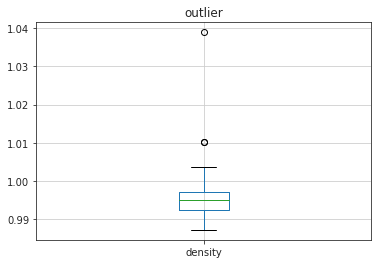

In [83]:
sns.set_style('ticks')
df['density'].plot(kind='box')
plt.grid() 
plt.title('outlier')
plt.show()

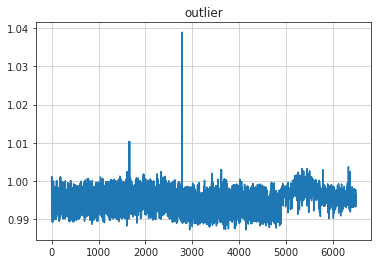

In [84]:
sns.set_style('ticks')
df['density'].plot(kind='line' )
plt.grid() 
plt.title('outlier')
plt.show()

In [85]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [86]:
lowerbound,upperbound = outlier_treatment(df['density'])

print(lowerbound)
print(upperbound)

0.985365
1.0039649999999998


In [87]:
df.shape

(6497, 13)

In [88]:
df[(df['density'] < lowerbound) | (df['density'] > upperbound)]


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,white,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,white,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,white,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [89]:
df.drop(df[ (df['density'] > upperbound) | (df['density'] < lowerbound) ].index , inplace=True)


In [90]:
df.shape

(6494, 13)